# Work on the neurons

In [1]:
# Initialization
# 1. Get the relevant dependencies 
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt
import heapq
from math import atan2,pi

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)




c:\Users\aurel\Documents\GitHub\Code_Thesis_GitHub\Code_Thesis_GitHub


In [5]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from event_model import event_model as em
from validator import validator_lite as vl
import data_analysis.event_generator as eg
from visual.color_map import Colormap


In [6]:
def load_event(file_name, plot_event=False):

    f = open(file_name)
    json_data_event = json.loads(f.read())

    ev = em.event(json_data_event, read_tracks=True)

    modules = ev.modules
    tracks = ev.real_tracks

    if plot_event:
        eg.plot_tracks_and_modules(tracks, modules, title="Loaded Event")

    modules_even = []
    modules_odd = []

    for i in range(len(modules)):
        if i % 2 == 0:
            modules_even.append(modules[i])
        else:
            modules_odd.append(modules[i])

    return json_data_event, modules

## Minibias dataset

In [100]:
Json_data_all_events = []
all_tracks = []
all_events = [i for i in range(995)]
random.seed(40)
random.shuffle(all_events)

nr_events = 10
event_file_name = "/datasets/minibias/velo_event_"
file_name = project_root + event_file_name


list_max_neurons =  []
for i in all_events[:]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)
len(list_max_neurons)

995


995

In [ ]:
maximum = list_max_neurons[0]
index = 0

for i, n in enumerate(list_max_neurons):
    if n > maximum:
        maximum = n
        index = i
print('Maximum value and its index:', maximum,',',index)

minimum = list_max_neurons[0]
index = 0

for i, n in enumerate(list_max_neurons):
    if n < maximum:
        minimum = n
        index = i
print('Minimum value and its index:',minimum,',',index)

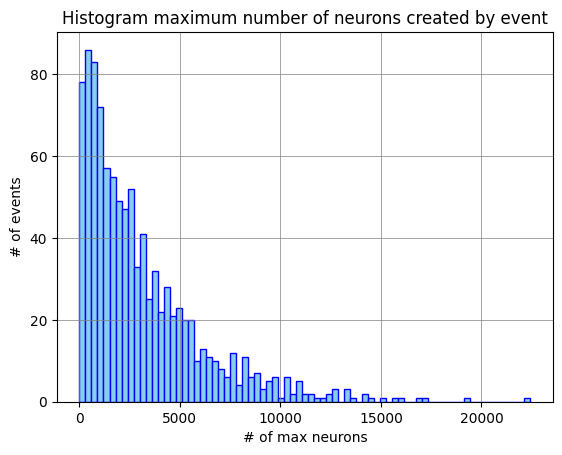

In [102]:
plt.hist(list_max_neurons,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of max neurons')
plt.ylabel('# of events')
#plt.ylim(0, 3)
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons created by event')
#plt.savefig(f'neurons_analysis/Histogram_neurons_analysis_minibias.png')
plt.show()     

## Bsphiphi dataset

In [103]:
all_events = [i for i in range(1000)]

random.seed(40)
random.shuffle(all_events)

nr_events = 10
event_file_name = "/datasets/bsphiphi/velo_event_"
file_name = project_root + event_file_name

list_max_neurons =  []
for i in all_events[:]:
        #print("[INFO] Evaluate Event: %s" % file_name + str(i))
        size = os.path.getsize(file_name + str(i) + ".json")
        json_data_event, modules = load_event(file_name + str(i) + ".json", plot_event=False)

        modules_count = len(modules)
        hit_counts = [len(module.hits()) for module in modules]
        neuron_count = [
            hit_counts[i] * hit_counts[i + 1]
            for i in range(modules_count - 1)
            ]
        max_neurons = max(neuron_count)
        list_max_neurons.append(max_neurons)
        
len(list_max_neurons)

1000


1000

In [109]:
maximum = list_max_neurons[0]
index = 0

for i, n in enumerate(list_max_neurons):
    if n > maximum:
        maximum = n
        index = i
print('Maximum value and its index:', maximum,',',index)

minimum = list_max_neurons[0]
index = 0

for i, n in enumerate(list_max_neurons):
    if n < maximum:
        minimum = n
        index = i
print('Minimum value and its index:',minimum,',',index)

Maximum value and its index: 40145 , 292
Minimum value and its index: 2009 , 999


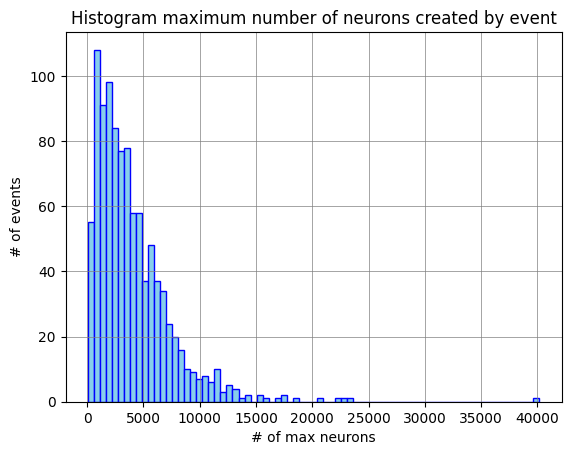

In [104]:
plt.hist(list_max_neurons,color = "skyblue", edgecolor='blue',bins=75)
plt.xlabel('# of max neurons')
plt.ylabel('# of events')
plt.grid(True, color='grey', linewidth=0.5)
plt.title('Histogram maximum number of neurons created by event')
#plt.savefig(f'neurons_analysis/Histogram_neurons_analysis_bsphiphi.png')
plt.show()     